In [102]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [103]:
import pandas as pd

superstore_file = pd.read_excel("/content/drive/MyDrive/GENAI/Week2/Day5/US Superstore data.xls")
df_superstore = pd.DataFrame(superstore_file)
df_superstore.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [104]:
df_superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [105]:
df_superstore.drop_duplicates(inplace=True)

In [106]:
columns = df_superstore.select_dtypes(include='number').columns

outliers = pd.DataFrame()

for col in columns:
  Q1 = df_superstore[col].quantile(0.25)
  Q3 = df_superstore[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outlier = df_superstore[(df_superstore[col] < lower_bound) | (df_superstore[col] > upper_bound)]
  outlier['outliers'] = col
  outliers = pd.concat([outliers, outlier])

outliers.drop_duplicates(inplace=True)
outliers

/tmp/ipython-input-106-2389085306.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier['outliers'] = col
/tmp/ipython-input-106-2389085306.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier['outliers'] = col
/tmp/ipython-input-106-2389085306.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,outliers
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,Sales
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,Sales
7,8,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6,0.20,90.7152,Sales
10,11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092,Sales
11,12,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,West,TEC-PH-10002033,Technology,Phones,Konftel 250 Conference phone - Charcoal black,911.4240,4,0.20,68.3568,Sales
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9957,9958,US-2014-143287,2014-11-11,2014-11-17,Standard Class,KN-16705,Kristina Nunn,Home Office,United States,New Rochelle,...,East,OFF-PA-10004039,Office Supplies,Paper,Xerox 1882,223.9200,4,0.00,109.7208,Profit
9962,9963,CA-2015-168088,2015-03-19,2015-03-22,First Class,CM-12655,Corinna Mitchell,Home Office,United States,Houston,...,Central,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.4656,4,0.32,-67.6704,Profit
9968,9969,CA-2017-153871,2017-12-11,2017-12-17,Standard Class,RB-19435,Richard Bierner,Consumer,United States,Plainfield,...,East,OFF-BI-10004600,Office Supplies,Binders,Ibico Ibimaster 300 Manual Binding System,735.9800,2,0.00,331.1910,Profit
9979,9980,US-2016-103674,2016-12-06,2016-12-10,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,...,West,OFF-BI-10002026,Office Supplies,Binders,Ibico Recycled Linen-Style Covers,437.4720,14,0.20,153.1152,Profit


In [107]:
df_superstore.drop(outliers.index, inplace = True)
df_superstore.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2,0.0,41.9136
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.2,2.5164
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,0.0,14.1694
6,7,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280,4,0.0,1.9656


In [108]:
df_superstore_cleaned = df_superstore.copy()

In [109]:
df_superstore_reduced = df_superstore_cleaned.drop(["Order ID", "Customer ID", "Product ID"], axis = 1)
df_superstore_reduced.head()

,Row ID,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2,0.0,41.9136
2,3,2016-06-12,2016-06-16,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714
4,5,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.2,2.5164
5,6,2014-06-09,2014-06-14,Standard Class,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,0.0,14.1694
6,7,2014-06-09,2014-06-14,Standard Class,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,Newell 322,7.280,4,0.0,1.9656


In [110]:
df_superstore_reduced["Profit Margin"] = (df_superstore_reduced["Profit"] / df_superstore_reduced["Sales"]) * 100
df_superstore_reduced["Order Year"] = df_superstore_reduced["Order Date"].dt.year
df_superstore_reduced["Order Month"] = df_superstore_reduced["Order Date"].dt.month
df_superstore_reduced["Ship Year"] = df_superstore_reduced["Ship Date"].dt.year
df_superstore_reduced["Ship Month"] = df_superstore_reduced["Ship Date"].dt.month

df_superstore_reduced.head()

,Row ID,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Postal Code,...,Product Name,Sales,Quantity,Discount,Profit,Profit Margin,Order Year,Order Month,Ship Year,Ship Month
0,1,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,...,Bush Somerset Collection Bookcase,261.960,2,0.0,41.9136,16.00,2016,11,2016,11
2,3,2016-06-12,2016-06-16,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,...,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714,47.00,2016,6,2016,6
4,5,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,...,Eldon Fold 'N Roll Cart System,22.368,2,0.2,2.5164,11.25,2015,10,2015,10
5,6,2014-06-09,2014-06-14,Standard Class,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,...,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,0.0,14.1694,29.00,2014,6,2014,6
6,7,2014-06-09,2014-06-14,Standard Class,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,...,Newell 322,7.280,4,0.0,1.9656,27.00,2014,6,2014,6


In [111]:
df = df_superstore_reduced.drop(["Order Date", "Ship Date"], axis = 1)
df.head()

,Row ID,Ship Mode,Customer Name,Segment,Country,City,State,Postal Code,Region,Category,...,Product Name,Sales,Quantity,Discount,Profit,Profit Margin,Order Year,Order Month,Ship Year,Ship Month
0,1,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,...,Bush Somerset Collection Bookcase,261.960,2,0.0,41.9136,16.00,2016,11,2016,11
2,3,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,...,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714,47.00,2016,6,2016,6
4,5,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,...,Eldon Fold 'N Roll Cart System,22.368,2,0.2,2.5164,11.25,2015,10,2015,10
5,6,Standard Class,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,Furniture,...,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,0.0,14.1694,29.00,2014,6,2014,6
6,7,Standard Class,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,...,Newell 322,7.280,4,0.0,1.9656,27.00,2014,6,2014,6


Which states have the most sales?

In [112]:
most_sales = df.groupby("State")["Sales"].sum().sort_values(ascending = False).head(1)
most_sales

,Sales
State,
California,130572.2035


What is the difference between New York and California in terms of sales and profit?

In [113]:
filtered_df = df[(df["State"] == "New York") | (df["State"] == "California")]
state_sales = filtered_df.groupby("State")[["Sales", "Profit"]].sum()
state_sales

,Sales,Profit
State,,
California,130572.2035,23229.9930
New York,61023.7050,13406.5385


Who is an outstanding customer in New York?

In [114]:
filtered_df = df[(df["State"] == "New York")]
top_customer = filtered_df.groupby("Customer Name")["Sales"].sum().sort_values(ascending = False).head(1)
top_customer

,Sales
Customer Name,
Caroline Jumper,1012.81


Are there any differences among states in profitability?

In [115]:
import matplotlib.pyplot as plt
import ipywidgets as widgets


category_dropdown = widgets.Dropdown(
    options=df['Category'].unique(),
    description='Category:'
)

def update_chart(selected_category):

    filtered_df = df[df['Category'] == selected_category]

    grouped = filtered_df.groupby('State')['Profit'].sum().reset_index()

    plt.figure(figsize=(10, 6))
    plt.bar(grouped["State"], grouped["Profit"])
    plt.title(f'Sales per state for {selected_category}')
    plt.xlabel('State')
    plt.ylabel('Total Sales')
    plt.xticks(rotation=90)
    plt.legend(title=selected_category)
    plt.show()


widgets.interactive(update_chart, selected_category=category_dropdown)

interactive(children=(Dropdown(description='Category:', options=('Furniture', 'Office Supplies', 'Technology')…

 Can we apply Pareto principle to customers and Profit ?

In [116]:
grouped = df.groupby('Customer Name')['Profit'].sum().reset_index()
grouped = grouped.sort_values(by='Profit', ascending=False)
grouped

,Customer Name,Profit
160,Chuck Clark,443.1515
60,Arthur Prichep,436.8827
592,Paul Prost,419.0327
385,John Lee,412.8366
500,Matt Abelman,406.2710
...,...,...
764,Troy Blackwell,-17.4571
536,Mick Crebagga,-17.9051
408,Justin Hirsh,-18.0742
539,Mike Gockenbach,-18.8184


In [117]:
grouped.reset_index(drop=True, inplace=True)

In [118]:
import numpy as np

n_customer = grouped.shape[0]
total_sales = grouped['Profit'].sum()

grouped['cum_Profit'] = grouped["Profit"].cumsum()
grouped['cum_Pofit_%'] = grouped['cum_Profit']/total_sales * 100
grouped["customer_%"] =(grouped.index + 1)/n_customer * 100
grouped

,Customer Name,Profit,cum_Profit,cum_Pofit_%,customer_%
0,Chuck Clark,443.1515,443.1515,0.477166,0.127065
1,Arthur Prichep,436.8827,880.0342,0.947582,0.254130
2,Paul Prost,419.0327,1299.0669,1.398779,0.381194
3,John Lee,412.8366,1711.9035,1.843303,0.508259
4,Matt Abelman,406.2710,2118.1745,2.280758,0.635324
...,...,...,...,...,...
782,Troy Blackwell,-17.4571,92955.0128,100.089907,99.491741
783,Mick Crebagga,-17.9051,92937.1077,100.070628,99.618806
784,Justin Hirsh,-18.0742,92919.0335,100.051166,99.745870
785,Mike Gockenbach,-18.8184,92900.2151,100.030903,99.872935


In [119]:
grouped = grouped[grouped['cum_Pofit_%'] >= 80].head(1)
grouped

,Customer Name,Profit,cum_Profit,cum_Pofit_%,customer_%
417,Heather Jas,98.6548,74321.8373,80.026516,53.113088


No, 20% of customers do not contribute to 80% of the profit

What are the Top 20 cities by Sales ?

In [120]:
grouped = df.groupby('City')['Sales'].sum().reset_index().sort_values(by = 'Sales', ascending=False).head(20)
grouped.reset_index(drop=True, inplace=True)
grouped

,City,Sales
0,Los Angeles,52122.8965
1,New York City,50847.3030
2,Seattle,28177.3760
3,San Francisco,26637.5340
4,Philadelphia,22730.3030
5,Houston,16378.4726
6,San Diego,12138.0880
7,Chicago,12042.6350
8,Columbus,10588.0100
9,Dallas,9086.9736


In [121]:
grouped2 = df.groupby('City')['Profit'].sum().reset_index().sort_values(by = 'Profit', ascending=False).head(20)
grouped2.reset_index(drop=True, inplace=True)
grouped2

,City,Profit
0,New York City,10922.1115
1,Los Angeles,8659.3129
2,San Francisco,5606.3066
3,Seattle,5274.7966
4,San Diego,2118.2453
5,Houston,1931.3872
6,Detroit,1889.8525
7,Columbus,1861.5010
8,Springfield,1751.5902
9,Richmond,1338.1226


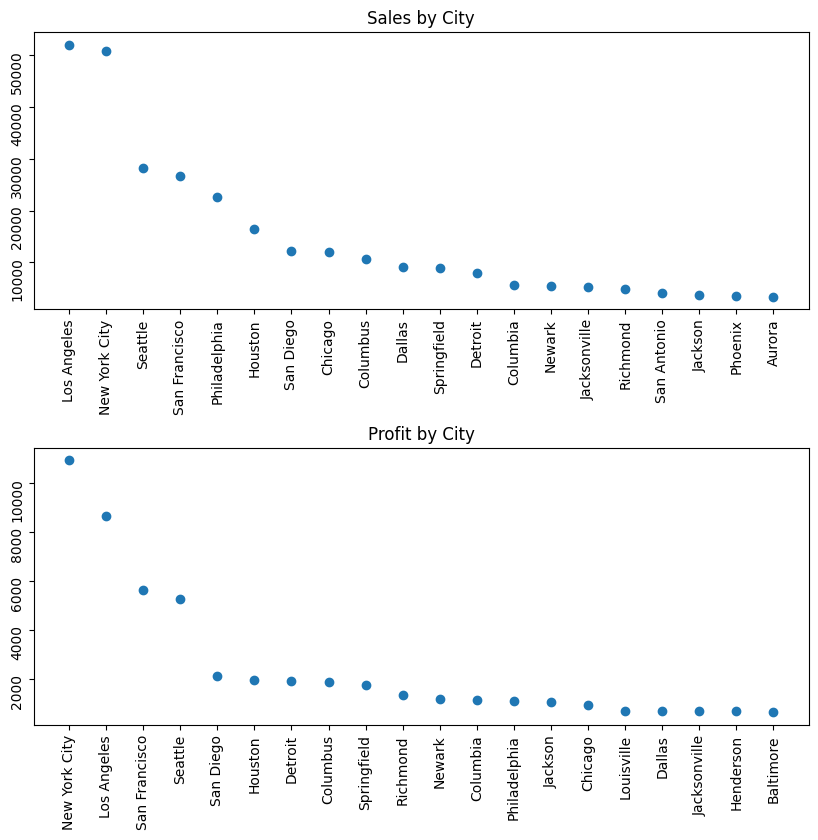

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

f, (ax1, ax2) = plt.subplots(2,1, figsize=(10,9))
ax1.scatter(x = 'City', y = 'Sales', data = grouped)
ax1.set_title('Sales by City')
ax1.tick_params(rotation=90)
ax2.scatter(x = 'City', y = 'Profit', data = grouped2)
ax2.set_title('Profit by City')
ax2.tick_params(rotation=90)
plt.subplots_adjust(hspace=0.5)
plt.show()

These plots show that although Los Angeles generates the highest sales, it ranks only second in terms of profit, behind New York City. This pattern is observed in several other cities as well, where higher sales do not necessarily translate into higher profits — likely due to lower profit margins.

What are the Top 20 customers by Sales?

In [123]:
most_sales = df.groupby("Customer Name")["Sales"].sum().sort_values(ascending = False).head(20)
most_sales

,Sales
Customer Name,
Paul Prost,2767.4700
William Brown,2477.9180
Joel Eaton,2441.4610
Arthur Gainer,2211.2510
Fred McMath,2158.7780
Adrian Barton,2146.6160
Chuck Clark,2134.7220
Sally Hughsby,2078.7835
Kunst Miller,2056.3260


Plot the Cumulative curve in Sales by Customers. Can we apply Pareto principle to customers and Sales ?

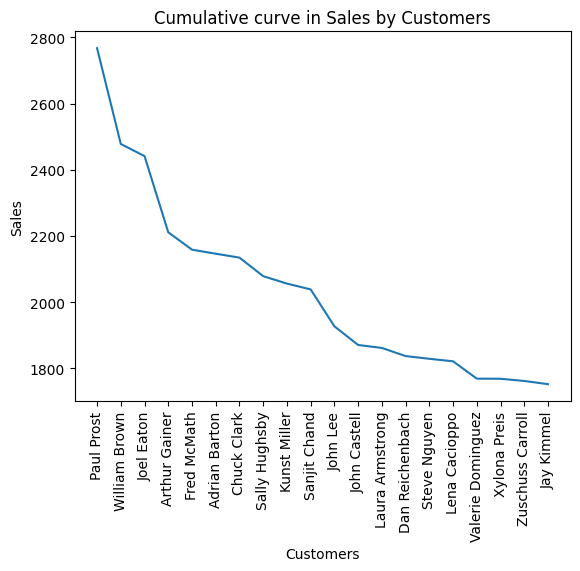

In [124]:
plt.plot(most_sales)
plt.title('Cumulative curve in Sales by Customers')
plt.xlabel('Customers')
plt.ylabel('Sales')
plt.xticks(rotation=90)
plt.show()

In [125]:
grouped = df.groupby('Customer Name')['Sales'].sum().reset_index()
grouped = grouped.sort_values(by='Sales', ascending=False)
grouped

,Customer Name,Sales
592,Paul Prost,2767.470
781,William Brown,2477.918
379,Joel Eaton,2441.461
59,Arthur Gainer,2211.251
290,Fred McMath,2158.778
...,...,...
616,Ralph Ritter,17.748
123,Carl Jackson,16.520
375,Jim Radford,14.040
543,Mitch Gastineau,12.320


In [126]:
grouped.reset_index(drop=True, inplace=True)

In [127]:

n_customer = grouped.shape[0]
total_sales = grouped['Sales'].sum()

grouped['cum_sales'] = grouped["Sales"].cumsum()
grouped['cum_sales_%'] = grouped['cum_sales']/total_sales * 100
grouped["customer_%"] =(grouped.index + 1)/n_customer * 100
grouped

,Customer Name,Sales,cum_sales,cum_sales_%,customer_%
0,Paul Prost,2767.470,2767.4700,0.511758,0.127065
1,William Brown,2477.918,5245.3880,0.969972,0.254130
2,Joel Eaton,2441.461,7686.8490,1.421444,0.381194
3,Arthur Gainer,2211.251,9898.1000,1.830347,0.508259
4,Fred McMath,2158.778,12056.8780,2.229546,0.635324
...,...,...,...,...,...
782,Ralph Ritter,17.748,540729.1267,99.991090,99.491741
783,Carl Jackson,16.520,540745.6467,99.994145,99.618806
784,Jim Radford,14.040,540759.6867,99.996741,99.745870
785,Mitch Gastineau,12.320,540772.0067,99.999019,99.872935


In [128]:
grouped = grouped[grouped['cum_sales_%'] >= 80].head(1)
grouped

,Customer Name,Sales,cum_sales,cum_sales_%,customer_%
430,Dianna Wilson,552.196,433073.2251,80.083468,54.76493


No, 20% of customers do not contribute to 80% of the sales

Based on the analysis, make decisions on which states and cities to prioritize for marketing strategies.

According to the analysis, it would be more effective from a marketing perspective to focus on New York, Los Angeles, San Francisco, and Seattle, as these cities generate the highest sales and profits.